In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import openturns as ot
import matplotlib.pyplot as plt

In [2]:
from matplotlib import rc
rc('font', **{'family': 'Libertine'})
rc('text', usetex=True)
rc('font', size=16)# Set the default text font size
rc('axes', titlesize=20)# Set the axes title font size
rc('axes', labelsize=16)# Set the axes labels font size
rc('xtick', labelsize=16)# Set the font size for x tick labels
rc('ytick', labelsize=16)# Set the font size for y tick labels
rc('legend', fontsize=16)# Set the legend font size

In [3]:
g = ot.SymbolicFunction(['x'], ['x * sin(x) + sin(6 * x)'])
x_train = np.array([1.2, 2., 5.2, 6.5, 8.2, 10.2,11.8]).reshape(-1, 1)
#x_train = np.array([1., 2., 3.5, 5.5, 7., 8.5, 10.5]).reshape(-1, 1)
y_train = g(x_train)
n = len(y_train)

basis = ot.ConstantBasisFactory(1).build()
covarianceModel = ot.MaternModel([1.], 1.5)
algo = ot.KrigingAlgorithm(x_train, y_train, covarianceModel, basis)
algo.run()
kriging_results = algo.getResult()
predictor = kriging_results.getMetaModel()

WRN - Warning! For coherency we set scale upper bounds = [21.2]


In [4]:
grid_size = 1000
dim = 1
lowerbound = [0.] * dim
upperbound = [12.] * dim
mesher = ot.IntervalMesher([grid_size-1] * dim)
interval = ot.Interval(lowerbound, upperbound)
mesh = mesher.build(interval)
nodes = mesh.getVertices()
x_node = np.array(nodes).flatten()
y_true = np.array(g(nodes)).flatten()

In [5]:
y_predictor = np.array(predictor(nodes)).flatten()

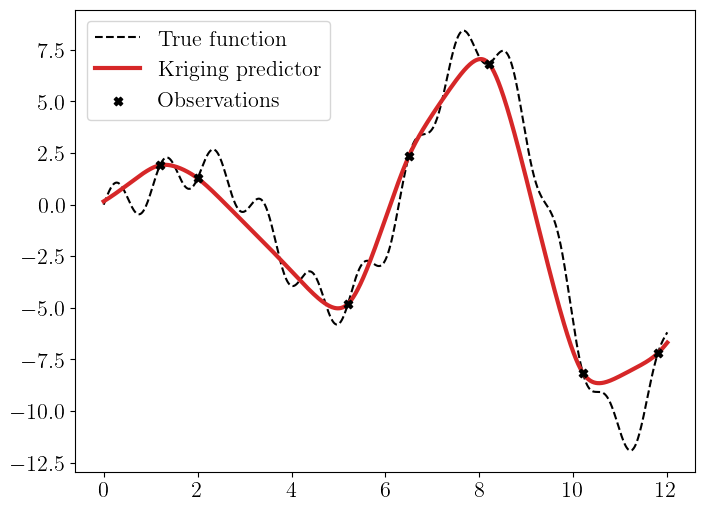

In [6]:
plt.figure(figsize=(8, 6))
plt.plot(x_node, y_true, color='k', linestyle='dashed', label='True function', zorder=0)
plt.plot(x_node, y_predictor, color='C3', linewidth=3, label='Kriging predictor', zorder=1)
plt.scatter(x_train, y_train, marker='X', color='k', label='Observations', zorder=2)
plt.legend(loc='best');

In [7]:
process = ot.ConditionedGaussianProcess(kriging_results, mesh)
trajectories_nb = 1000
trajectories = process.getSample(trajectories_nb)

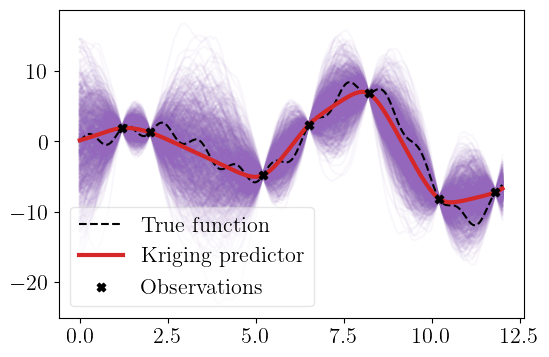

In [11]:
plt.figure(figsize=(6, 4))
for t in range(trajectories_nb):
    traj = np.array(trajectories.getMarginal(0)[t]).flatten()
    plt.plot(x_node, traj, color='C4', alpha=0.05, zorder=0)

plt.plot(x_node, y_true, color='k', linestyle='dashed', label='True function', zorder=1)
plt.plot(x_node, y_predictor, color='C3', linewidth=3, label='Kriging predictor', zorder=2)
plt.scatter(x_train, y_train, marker='X', color='k', label='Observations', zorder=3)
plt.legend(loc='lower left',fancybox=True, framealpha=0.5)
plt.savefig("figures/kriging_1D.png", dpi=300, bbox_inches='tight', transparent=True);